In [23]:
import os
# os.chdir('./code')
os.chdir('../')
print(os.getcwd())

c:\Users\giorg\OneDrive\Έγγραφα\Σχολή\7ο εξάμηνο\Νευρωνικά Δίκτυα\SVM on CIFAR-10


In [14]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
# Ensure read_data.py is in the same directory or provide the correct path
try:
	from read_data import read_data, read_test_data
except ModuleNotFoundError:
	print("Module read_data not found. Please ensure read_data.py is in the working directory.")
from scaler import MyScaler
from accuracy_metrics import cls_report, accuracy
import time
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def test_svm(X_train, X_train_pca, X_train_umap, y_train, X_test, X_test_pca, X_test_umap, y_test, kernel='rbf', C=1.0, gamma='scale', deg=1):
    accuracy_values = {'og': -1, 'pca': -1, 'umap': -1}

    # create the model - PCA data
    print('Creating pca model')
    start = time.time()
    if kernel == 'rbf':
        model_pca = SVC(kernel=kernel, C=C, gamma=gamma)
    else:
        model_pca = SVC(kernel=kernel, C=C, degree=deg)
    print(model_pca.fit(X_train_pca, y_train))
    print("Time taken: ", time.time()-start)  
    print('Model trained on PCA data')
    # test the model
    accuracy_values['pca'] = model_pca.score(X_test_pca, y_test)
    print('Accuracy PCA: ', accuracy_values['pca'])

    # create the model - UMAP data
    print('Creating umap model')
    start = time.time()
    if kernel == 'rbf':
        model_umap = SVC(kernel=kernel, C=C, gamma=gamma)
    else:
        model_umap = SVC(kernel=kernel, C=C, degree=deg)
    print(model_umap.fit(X_train_umap, y_train))
    print("Time taken: ", time.time()-start)  
    print('Model trained on UMAP data')
    # test the model
    accuracy_values['umap'] = model_umap.score(X_test_umap, y_test)
    print('Accuracy UMAP: ', accuracy_values['umap'])

    # create the model - original data
    print('Creating og model')
    start = time.time()
    if kernel == 'rbf':
        model_og = SVC(kernel=kernel, C=C, gamma=gamma)
    else:
        model_og = SVC(kernel=kernel, C=C, degree=deg)
    print(model_og.fit(X_train, y_train))
    print("Time taken: ", time.time()-start)
    print('Model trained on original data')
    # test the model
    accuracy_values['og'] = model_og.score(X_test, y_test)
    print('Accuracy OG: ', accuracy_values['og'])

    return accuracy_values

In [17]:
# load the scaler
scaler: MyScaler = MyScaler.load_scaler('scaler.pkl')
# load the data
X_train, y_train = read_data()
# normalize the data
X_train = scaler.normalize_data(X_train)
print('Data loaded')

Data loaded


In [24]:
# split the data
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
# perform PCA
X_train_pca = scaler.pca_decomposition(X_train)
# perform UMAP
X_train_umap = scaler.umap_decomposition(X_train)
# load the test data
X_test, y_test = read_test_data()
# normalize the test data
X_test = scaler.normalize_data(X_test)
# perform PCA on the test data
X_test_pca = scaler.pca_decomposition(X_test)
# perform UMAP on the test data
X_test_umap = scaler.umap_decomposition(X_test)
print('Data preprocessed')

Data preprocessed


In [25]:
linear_scores = test_svm(X_train, X_train_pca, X_train_umap, y_train, X_test, X_test_pca, X_test_umap, y_test, kernel='poly', C=1.0, deg=1)

Creating pca model
SVC(degree=1, kernel='poly')
Time taken:  1.8539865016937256
Model trained on PCA data
Accuracy PCA:  0.8605
Creating umap model
SVC(degree=1, kernel='poly')
Time taken:  0.7488670349121094
Model trained on UMAP data
Accuracy UMAP:  0.804
Creating og model
SVC(degree=1, kernel='poly')
Time taken:  21.4895601272583
Model trained on original data
Accuracy OG:  0.8635


In [26]:
poly_scores_3 = test_svm(X_train, X_train_pca, X_train_umap, y_train, X_test, X_test_pca, X_test_umap, y_test, kernel='poly', C=1.0, deg=3)

Creating pca model
SVC(kernel='poly')
Time taken:  2.167231559753418
Model trained on PCA data
Accuracy PCA:  0.876
Creating umap model
SVC(kernel='poly')
Time taken:  1.3908240795135498
Model trained on UMAP data
Accuracy UMAP:  0.825
Creating og model
SVC(kernel='poly')
Time taken:  33.518659353256226
Model trained on original data
Accuracy OG:  0.8765


In [27]:
poly_scores_5 = test_svm(X_train, X_train_pca, X_train_umap, y_train, X_test, X_test_pca, X_test_umap, y_test, kernel='poly', C=1.0, deg=5)

Creating pca model
SVC(degree=5, kernel='poly')
Time taken:  3.464887857437134
Model trained on PCA data
Accuracy PCA:  0.859
Creating umap model
SVC(degree=5, kernel='poly')
Time taken:  46.39809441566467
Model trained on UMAP data
Accuracy UMAP:  0.834
Creating og model
SVC(degree=5, kernel='poly')
Time taken:  38.27379631996155
Model trained on original data
Accuracy OG:  0.861


In [28]:
rbf_scores = test_svm(X_train, X_train_pca, X_train_umap, y_train, X_test, X_test_pca, X_test_umap, y_test, kernel='rbf', C=1.0, gamma=0.001)  # hyperparameters decided by grid search

Creating pca model
SVC(gamma=0.001)
Time taken:  4.0455992221832275
Model trained on PCA data
Accuracy PCA:  0.9175
Creating umap model
SVC(gamma=0.001)
Time taken:  1.041856050491333
Model trained on UMAP data
Accuracy UMAP:  0.795
Creating og model
SVC(gamma=0.001)
Time taken:  42.73950815200806
Model trained on original data
Accuracy OG:  0.912


In [29]:
print('RBF scores: ', rbf_scores)
print('Linear scores: ', linear_scores)
print('Poly scores (degree=3): ', poly_scores_3)
print('Poly scores (degree=5): ', poly_scores_5)

RBF scores:  {'og': 0.912, 'pca': 0.9175, 'umap': 0.795}
Linear scores:  {'og': 0.8635, 'pca': 0.8605, 'umap': 0.804}
Poly scores (degree=3):  {'og': 0.8765, 'pca': 0.876, 'umap': 0.825}
Poly scores (degree=5):  {'og': 0.861, 'pca': 0.859, 'umap': 0.834}


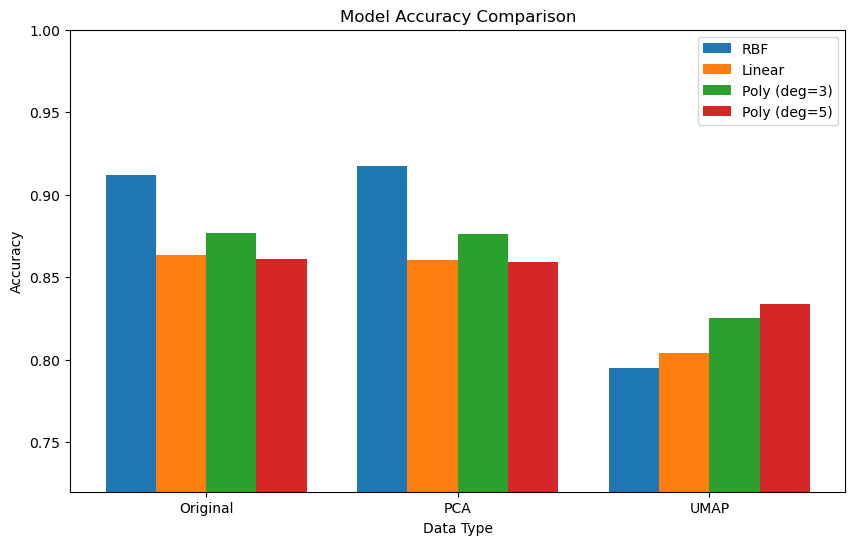

In [30]:
# Plot the accuracy values
labels = ['Original', 'PCA', 'UMAP']
rbf_scores_list = [rbf_scores['og'], rbf_scores['pca'], rbf_scores['umap']]
linear_scores_list = [linear_scores['og'], linear_scores['pca'], linear_scores['umap']]
poly_scores_3_list = [poly_scores_3['og'], poly_scores_3['pca'], poly_scores_3['umap']]
poly_scores_5_list = [poly_scores_5['og'], poly_scores_5['pca'], poly_scores_5['umap']]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, rbf_scores_list, width=0.2, label='RBF', align='center')
plt.bar([p + 0.2 for p in x], linear_scores_list, width=0.2, label='Linear', align='center')
plt.bar([p + 0.4 for p in x], poly_scores_3_list, width=0.2, label='Poly (deg=3)', align='center')
plt.bar([p + 0.6 for p in x], poly_scores_5_list, width=0.2, label='Poly (deg=5)', align='center')

plt.xlabel('Data Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([p + 0.3 for p in x], labels)
plt.ylim(0.72, 1)
plt.legend()
plt.show()